In [ ]:
         # Complete OCP Optimal Algae Control Model

using OptimalControl
using NLPModelsIpopt
using Plots
using MadNLP

# ------------------ Parameters ------------------
kP = 1.6
K = 140.0
I0 = 300.0
α = 0.1
kR_bar = 1.5
z_bar = 35.0
n = 3
tf = 100.0

# ------------------ Biological Functions ------------------
function I_light(z)
    return I0 * exp(-α * z)
end

function vP(p, z)
    return kP * p * I_light(z) / (K + p * I_light(z))
end

function kR(z)
    return kR_bar * z^n / (z_bar^n + z^n)
end

# ------------------ OptimalControl Solution ------------------
function OCP(c0,p0,z0,L)
    ocp = @def begin
        t ∈ [0, tf], time
        x = (c, p, z) ∈ R^3, state
        U ∈ R^2, control
        c(0) == c0
        p(0) == p0
        z(0) == z0
        0 ≤ U(t)[1] ≤ 1
        -1 ≤ U(t)[2] ≤ 1
        0 ≤ c(t) ≤ 1
        0 ≤ p(t) ≤ 1
        0 ≤ z(t) ≤ L
        c(t) + p(t) ≤ 1
        ẋ(t) == [
            vP(p(t), z(t)) * (1 - c(t)) - kR(z(t)) * c(t) * (1 - c(t) - p(t)),
            U(t)[1] * kR(z(t)) * c(t) * (1 - c(t) - p(t)) - vP(p(t), z(t)) * p(t),
            U(t)[2]
        ]
        ∫(vP(p(t), z(t))) → max
end

    sol1 = solve(ocp, :direct, :adnlp, :madnlp, grid_size=50, display=false)
    sol2 = solve(ocp, :direct, :adnlp, :madnlp, init=sol1, grid_size=100, display=false)
    sol3 = solve(ocp, :direct, :adnlp, :madnlp, init=sol2, grid_size=200, display=false)
    sol4 = solve(ocp, :direct, :adnlp, :ipopt, init=sol3, grid_size=300, display=false)
    sol5 = solve(ocp, :direct, :adnlp, :ipopt, init=sol4, grid_size=400, display=false)
    sol6 = solve(ocp, :direct, :adnlp, :ipopt, init=sol5, grid_size=500, display=false)
    sol7 = solve(ocp, :direct, :adnlp, :ipopt, init=sol6, grid_size=600, display=false)
    sol8 = solve(ocp, :direct, :adnlp, :ipopt, init=sol7, grid_size=700, display=false)
    sol = solve(ocp, :direct, :adnlp, :ipopt, init=sol8, grid_size=800, display=true)

    # ------------------ Results Visualization ------------------
    plt = plot(sol)
    display(plt)

    
    # ------------------ Extract and Print Solution Details ------------------
    #=
    λ = costate(sol)
    x = state(sol)
    U = control(sol)
    u = t -> U(t)[1]
    v = t -> U(t)[2]
    T = time_grid(sol)

    for i in eachindex(T)
        t = T[i]
        λ_val = λ(t)
        x_val = x(t)
        u_val = u(t)
        v_val = v(t)
        println("t = $(round(t, digits=2)) │ λ = $(round.(λ_val, digits=4)) │ c = $(round(x_val[1], digits=4)) │ p = $(round(x_val[2], digits=4)) │ z = $(round(x_val[3], digits=4)) │ u = $(round(u_val, digits=4)) │ v = $(round(v_val, digits=4))")
    end
    println("Maximum objective value ∫vP = ", objective(sol))  
    =# 
end 

OCP (generic function with 2 methods)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_3gTiVKRaL6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_REPYFg1O56\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_1SJ6PebyXU\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_t8DeHOpOfK\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 1.94e-02   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_XWVWFGZoxS\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_vg9gzA5UdA\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


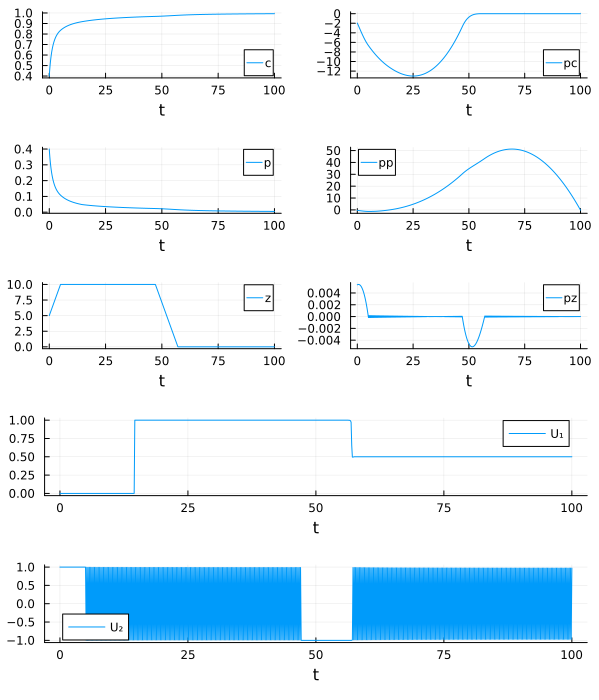

In [20]:
OCP(0.4,0.4,5,10)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_taLWb2pQtC\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_fqVeFadML6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_lMF8JalK12\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_l4r8TwBAnK\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 1.65e-03   0.0 0.00e+00    -  0.00e+00 0.00e+00 

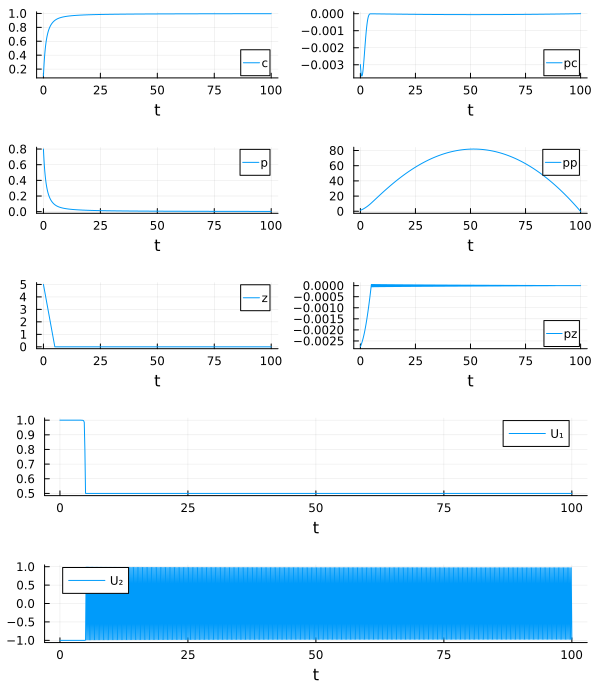

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_rCRqjSbQZM\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


In [21]:
OCP(0.1,0.8,5,10)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_zQh6VG16d0\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_BAVSbCHabU\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_ZSbIVEjgrC\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_rU1Itw7sD6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 4.37e-02   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_lI9y1ctSLw\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_hchuRi7qp8\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


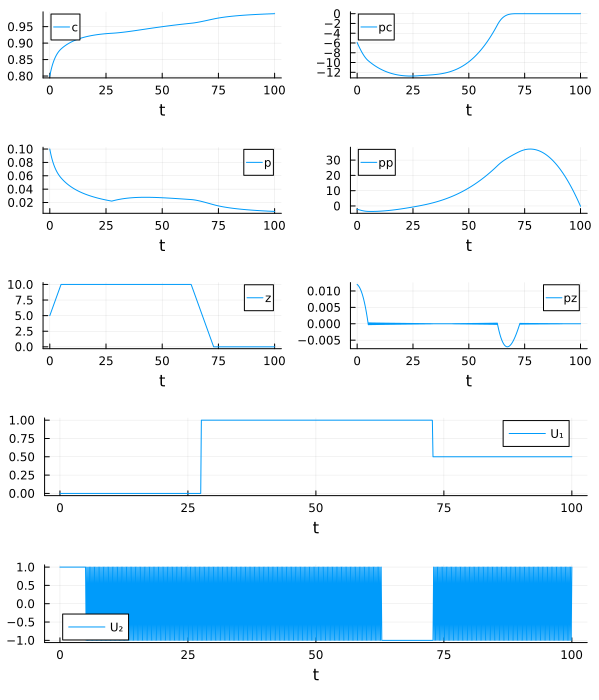

In [22]:
OCP(0.8,0.1,5,10)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_BArgNqRAZO\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_jGhqZGdGVm\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_xMTQTmNyLI\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_Dif43cjCt8\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.25e-01 3.55e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_3ajkRWzshE\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_h6rOxUfYV6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


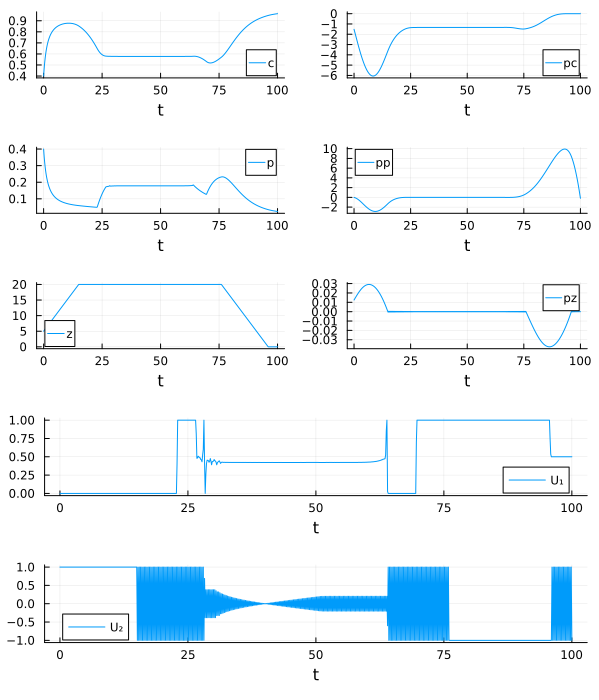

In [23]:
OCP(0.4,0.4,5,20)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_PK3GnuxUB4\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_FSPiXmRQb0\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_LcNSjuj0LW\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_1KvWLW9Kbg\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.25e-01 3.24e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_nIz0Jeb2zE\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_X4vAnmLM1S\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


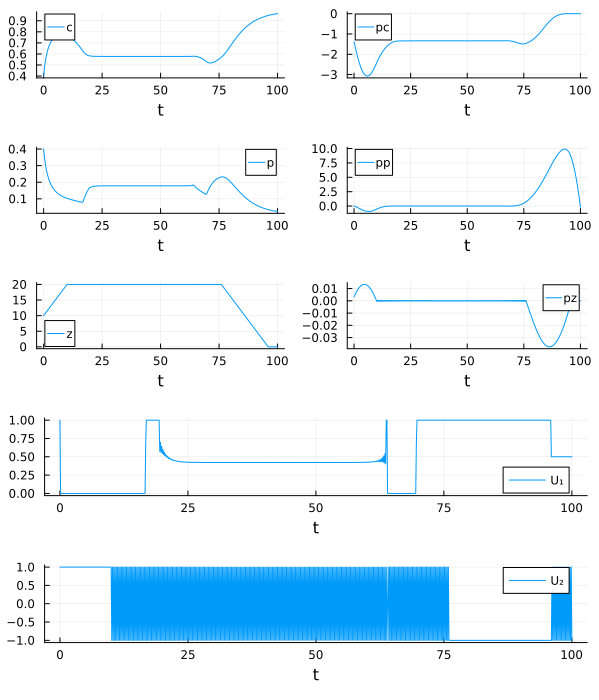

In [24]:
OCP(0.4,0.4,10,20)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_Jwj63Mha5u\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_ByFyhwrmBW\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_haH4JGF05w\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_zuT0ZQVAB6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.25e-01 3.97e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

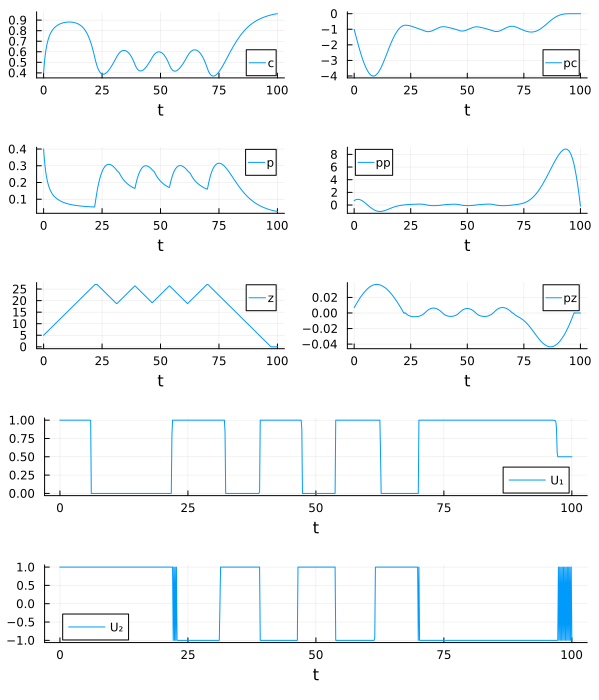

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_J6b2bK3cXa\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_XIVEFIHMp2\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


In [26]:
OCP(0.4,0.4,5,27)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_luPgLC7y1G\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_bepU3uj0RM\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_9ubUJCxSLs\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.25e-01 4.00e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_jgla5WhyJA\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_3qHgZ2JKPW\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_n4DQXcTGzS\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


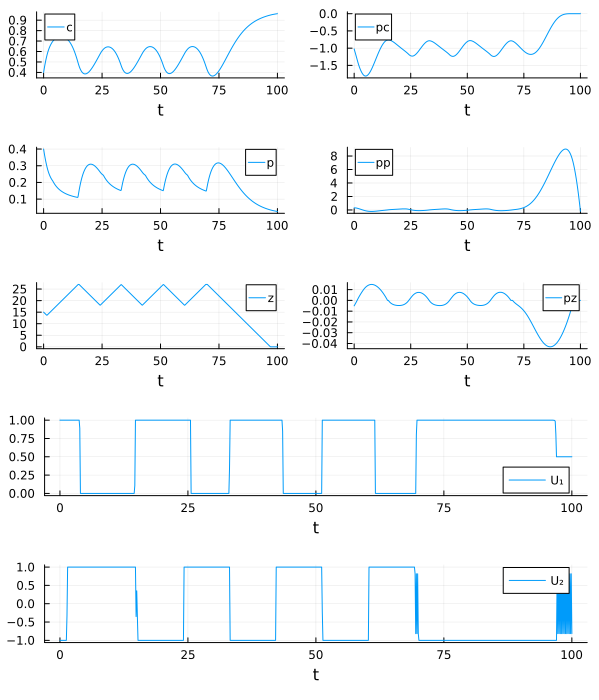

In [27]:
OCP(0.4,0.4,15,27)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_9KlU5k7it8\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_hEBqtYxyRY\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_bePud2dYVg\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_jyvaVgJuhu\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.25e-01 4.32e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_d0XgtY3M9O\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_Ji5ERUR21S\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


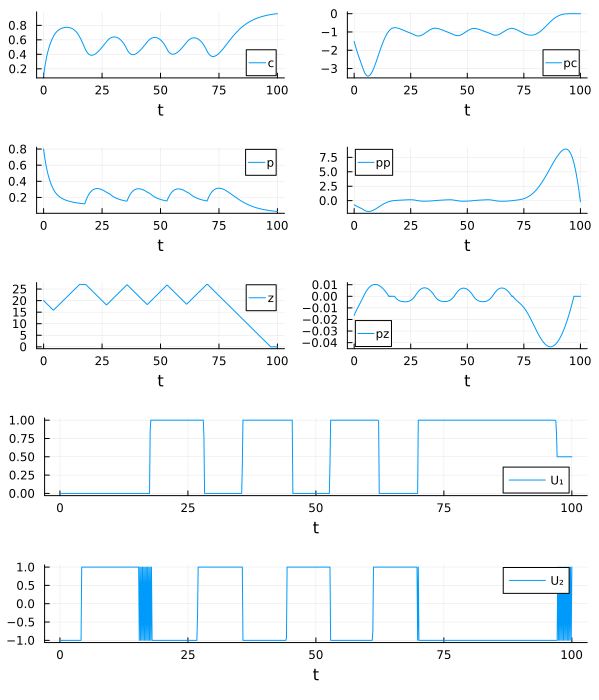

In [28]:
OCP(0.1,0.8,20,27)